DATA MITIGATION USING RESAMPLING

In [1]:
#IMPORTING ALL THE NECESSARY PACKAGES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight


In [2]:
#ASSIGNING ALL THE REQUIRED VARIABLES

data_path = "./datasets/adult.csv"
target_column = "income"
random_state = 42
data = None
df = None
le = LabelEncoder()
model = None
features = None
target = None
train_data = None
test_data = None
train_target = None
test_target = None

In [3]:
#LOADING THE DATA

data = pd.read_csv(data_path)
df = pd.DataFrame(data)
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
#DATA PREPROCESSING

print("\nDataset head before preprocessing:")
print(df.head())

        # Assume '?' represents missing values and replace with NaN
df.replace('?', pd.NA, inplace=True)

        # Handling missing values
df.dropna(inplace=True)

        # Removing specified columns that are not useful for the analysis
drop_columns = ['fnlwgt', 'capital-gain', 'capital-loss']
df.drop(columns=drop_columns, inplace=True)

        # Encoding categorical variables using LabelEncoder class
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

features = df.drop(columns=[target_column])
target = df[target_column]

        # Print the head of the dataset after preprocessing
print("\n\nDataset head after preprocessing:")
print(df.head())
print(df.columns)


Dataset head before preprocessing:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

  

VISUALIZATION OF EACH COLUMN WITH RESPECT TO THE TARGET COLUMN


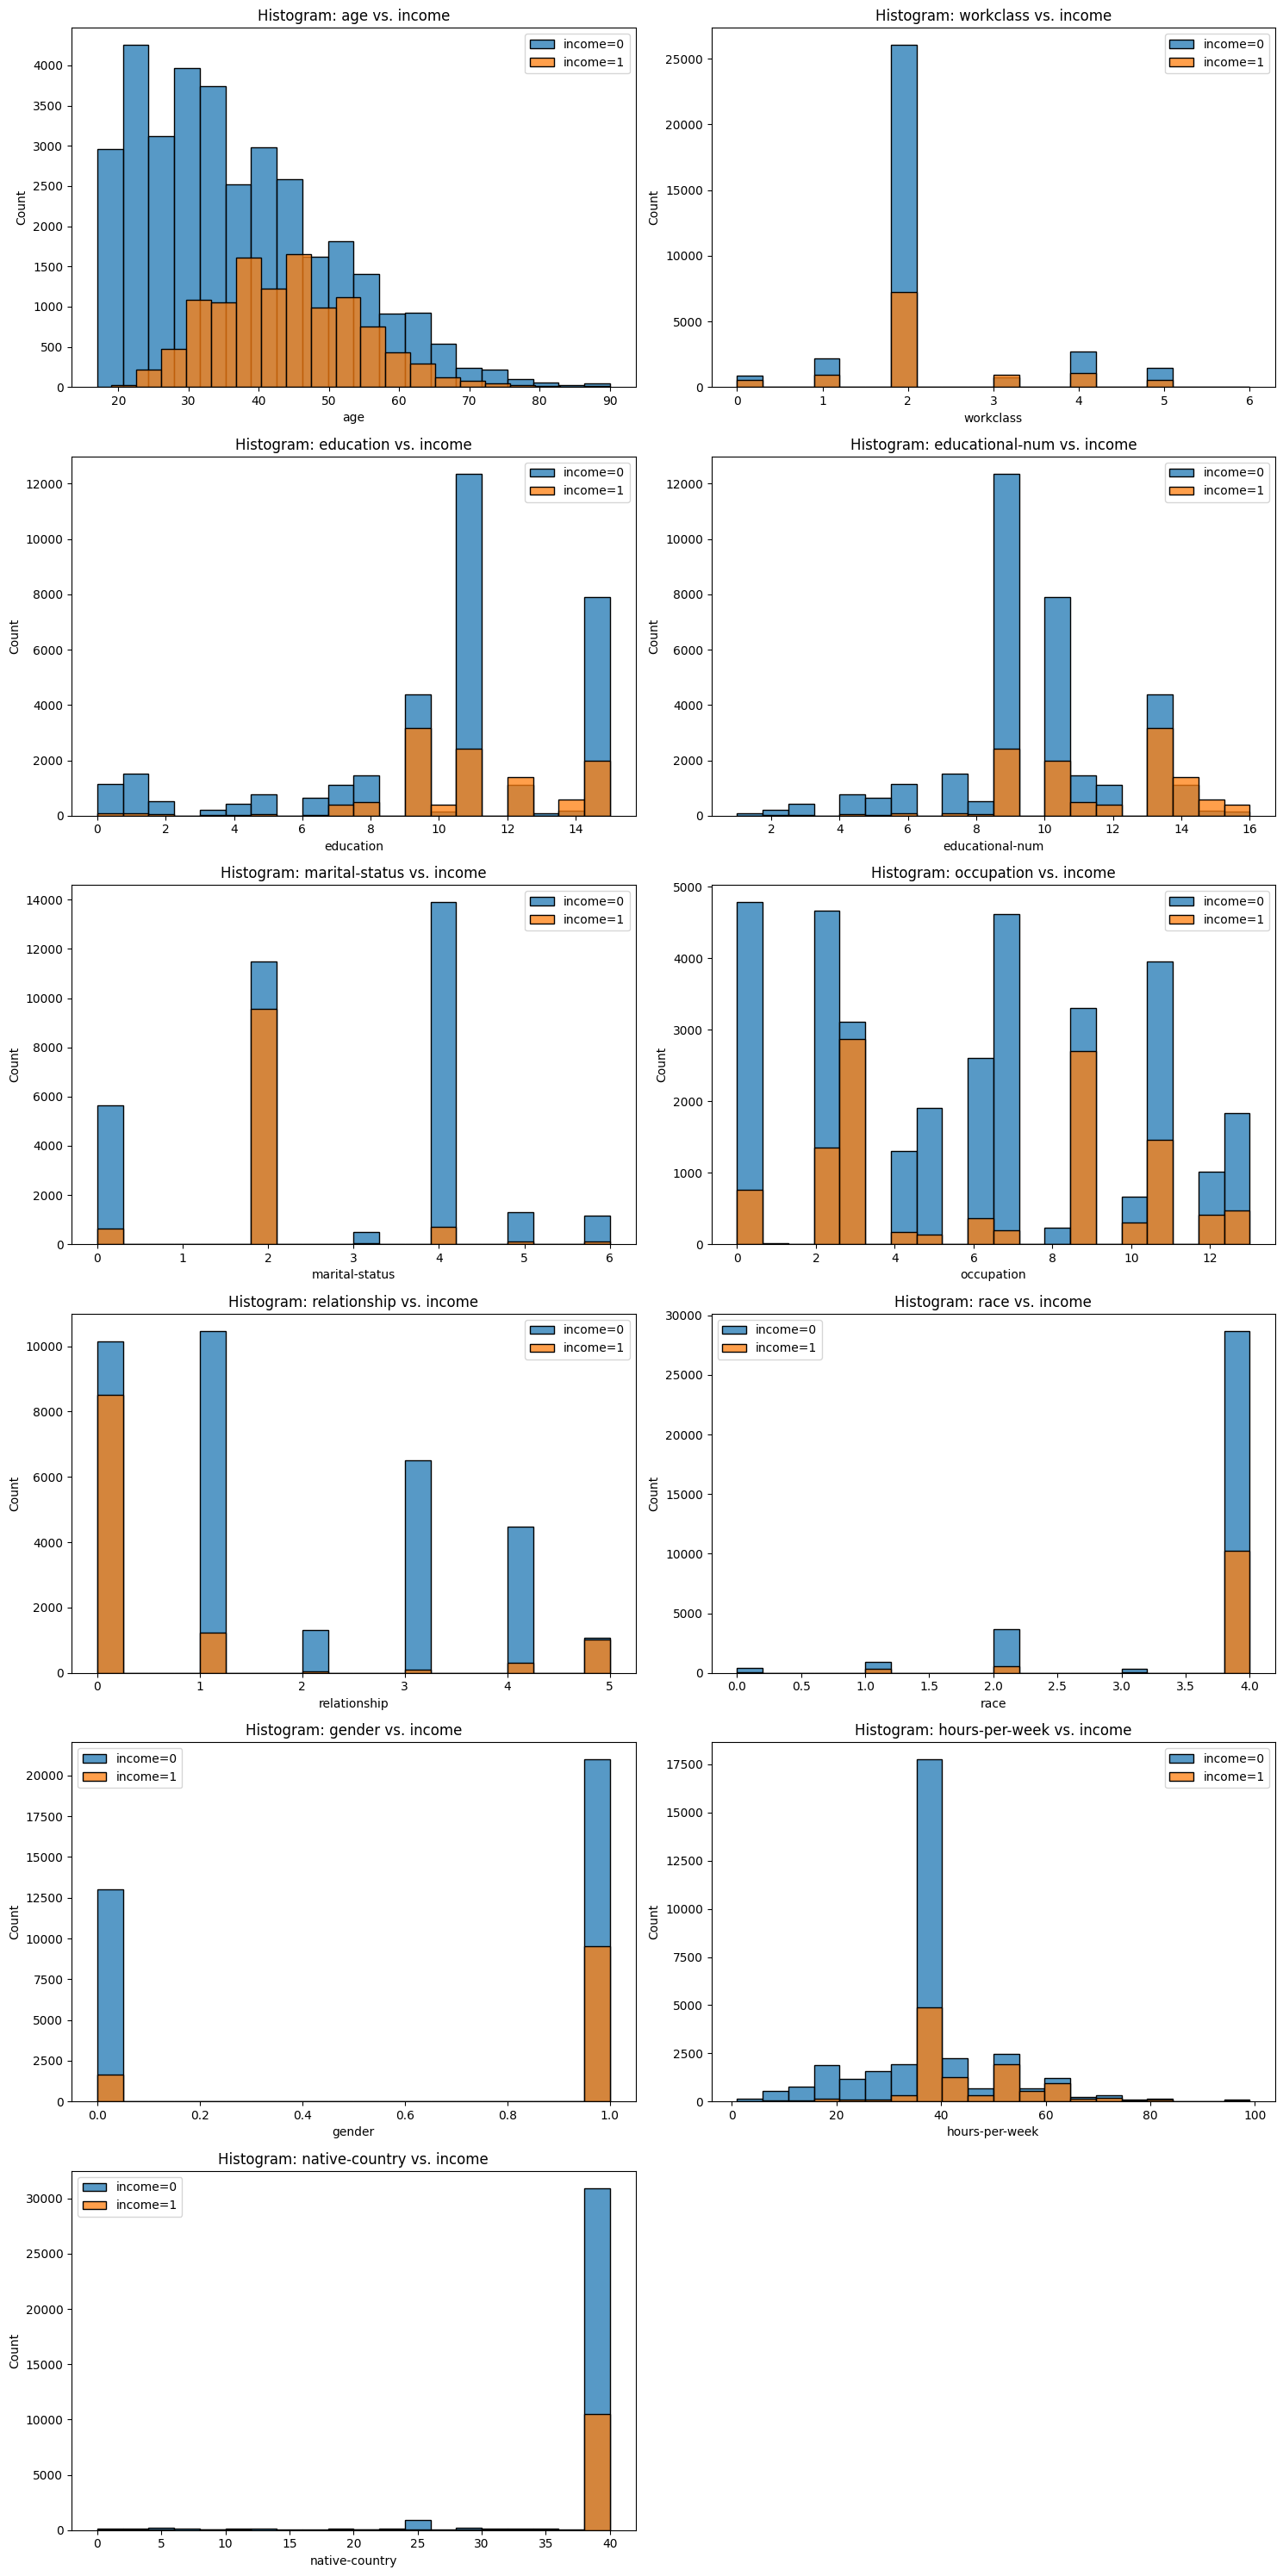

In [5]:
#VISULAIZING DATA USING HISTOGRAM PLOT

print("VISUALIZATION OF EACH COLUMN WITH RESPECT TO THE TARGET COLUMN")
# Visualization of data for each column against the target variable using histograms
num_columns = len(features.columns)
num_rows = (num_columns + 1) // 2
plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(features.columns, start=1):
    plt.subplot(num_rows, 2, i)
    for label in df[target_column].unique():
        sns.histplot(df[df[target_column] == label][col], bins=20, label=f'{target_column}={label}', kde=False)
    plt.title(f'Histogram: {col} vs. {target_column}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend()

plt.tight_layout()
plt.show()

In [7]:
#CHECKING THE ACCURACY SCORE BEFORE THE DATA MITIGATION PROCESS

train_data, test_data, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=random_state)

model_before_resampling = RandomForestClassifier(random_state=random_state)

model_before_resampling.fit(train_data, train_target)
        
predictions_before_resampling = model_before_resampling.predict(test_data)

accuracy_before_resampling = accuracy_score(test_target, predictions_before_resampling)
report_resampled = classification_report(test_target, predictions_before_resampling)
print(f'Model Accuracy before Resampling: {accuracy_before_resampling}\n Classification Report before Resampling:\n{report_resampled}')

Model Accuracy before Resampling: 0.8187949143173023
 Classification Report before Resampling:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      6842
           1       0.65      0.55      0.60      2203

    accuracy                           0.82      9045
   macro avg       0.76      0.73      0.74      9045
weighted avg       0.81      0.82      0.81      9045



In [ ]:
#CHECKING THE PRESENCE OF SELECTION BIAS IN THE DATASET(COLUMN WISE)

for col in features.columns:
    print("\n")
    print(col)
    positive_data = df[df[col] == 1]
    negative_data = df[df[col] == 0]

# Calculate statistical parity difference
    favorable_outcome_rate_positive = positive_data[target_column].mean()
    favorable_outcome_rate_negative = negative_data[target_column].mean()

    statistical_parity_difference = favorable_outcome_rate_positive - favorable_outcome_rate_negative

    print(f'Statistical Parity Difference for {col}: {statistical_parity_difference}')

# Check for bias
    if abs(statistical_parity_difference) <= 0.1:
        print(f'NO SIGNIFICANT SELECTION BIAS IS BEEN DETECTED IN {col} COLUMN.')
    else:
        print(f'SELECTION SELECTION BIAS IS DETECTED IN {col} COLUMN.')



age
Statistical Parity Difference for age: nan
SELECTION SELECTION BIAS IS DETECTED IN age COLUMN.


workclass
Statistical Parity Difference for workclass: -0.0953081264626256
NO SIGNIFICANT SELECTION BIAS IS BEEN DETECTED IN workclass COLUMN.


education
Statistical Parity Difference for education: -0.012076036962945645
NO SIGNIFICANT SELECTION BIAS IS BEEN DETECTED IN education COLUMN.


educational-num
Statistical Parity Difference for educational-num: nan
SELECTION SELECTION BIAS IS DETECTED IN educational-num COLUMN.


marital-status
Statistical Parity Difference for marital-status: 0.3334822137525806
SELECTION SELECTION BIAS IS DETECTED IN marital-status COLUMN.


occupation
Statistical Parity Difference for occupation: 0.14925219185146982
SELECTION SELECTION BIAS IS DETECTED IN occupation COLUMN.


relationship
Statistical Parity Difference for relationship: -0.35080909297557805
SELECTION SELECTION BIAS IS DETECTED IN relationship COLUMN.


race
Statistical Parity Difference f

In [ ]:
#DATA MITIGATION USING RESAMPLING TECHNIQUE

positive_data = df[target == 1]
negative_data = df[target == 0]

negative_data_resampled = resample(negative_data, replace=True, n_samples=len(positive_data), random_state=random_state)

df_resampled = pd.concat([positive_data, negative_data_resampled])
train_data, test_data, train_target, test_target = train_test_split(df_resampled.drop(columns=[target_column]), le.fit_transform(df_resampled[target_column]), test_size=0.2, random_state=random_state)

model = RandomForestClassifier(random_state=random_state)
model.fit(train_data, train_target)
print(data)
        # After model fitting, adjust class weights for the RandomForestClassifier
class_weights = compute_class_weight('balanced', classes=np.unique(train_target), y=train_target)
class_weight_dict = dict(enumerate(class_weights))

model = RandomForestClassifier(random_state=random_state, class_weight=class_weight_dict)
model.fit(train_data, train_target)
print(data)

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

        # Ensure stratified sampling in train-test split
train_data, test_data, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=random_state, stratify=target)


       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18          <NA>  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

In [ ]:
#FINDING THE ACCURACY SCORE AND CLASSIFICATION REPORT AFTER RESAMPLING TECHNIQUE

predictions_resampled = model.predict(test_data)
accuracy_resampled = accuracy_score(test_target, predictions_resampled)
report_resampled = classification_report(test_target, predictions_resampled)

print(f'Resampled Model Accuracy: {accuracy_resampled}\nResampled Classification Report:\n{report_resampled}')



Resampled Model Accuracy: 0.8873410724156993
Resampled Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      6803
           1       0.70      0.95      0.81      2242

    accuracy                           0.89      9045
   macro avg       0.84      0.91      0.86      9045
weighted avg       0.91      0.89      0.89      9045



DATA MITIGATION USING REWEIGHTING TECHNIQUE

In [ ]:
#IMPORTING ALL THE NECESSARY PACKAGES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight


In [ ]:
#ASSIGNING ALL THE REQUIRED VARIABLES

data_path = "./datasets/Employee.csv"
target_column = "LeaveOrNot"
random_state = 42
data = None
df = None
le = LabelEncoder()
model = None
features = None
target = None
train_data = None
test_data = None
train_target = None
test_target = None

In [ ]:
#LOADING THE DATA

data = pd.read_csv(data_path)
df = pd.DataFrame(data)
print(data)


      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDo

In [ ]:
#DATA PREPROCESSING

print("\nDataset head before preprocessing:")
print(df.head())

# Encoding categorical variables using LabelEncoder class
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

features = df.drop(columns=[target_column])
target = df[target_column]

# Print the head of the dataset after preprocessing
print("\n\nDataset head after preprocessing:")
print(df.head())
print(df.columns)


Dataset head before preprocessing:
   Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1  


Dataset head after preprocessing:
   Education  JoiningYear  City  PaymentTier  Age  Gender  EverBenched  \
0          0         2017     0            3   34       1            0   
1          0         2013     2            1   28    

VISUALIZATION OF EACH COLUMN WITH RESPECT TO THE TARGET COLUMN


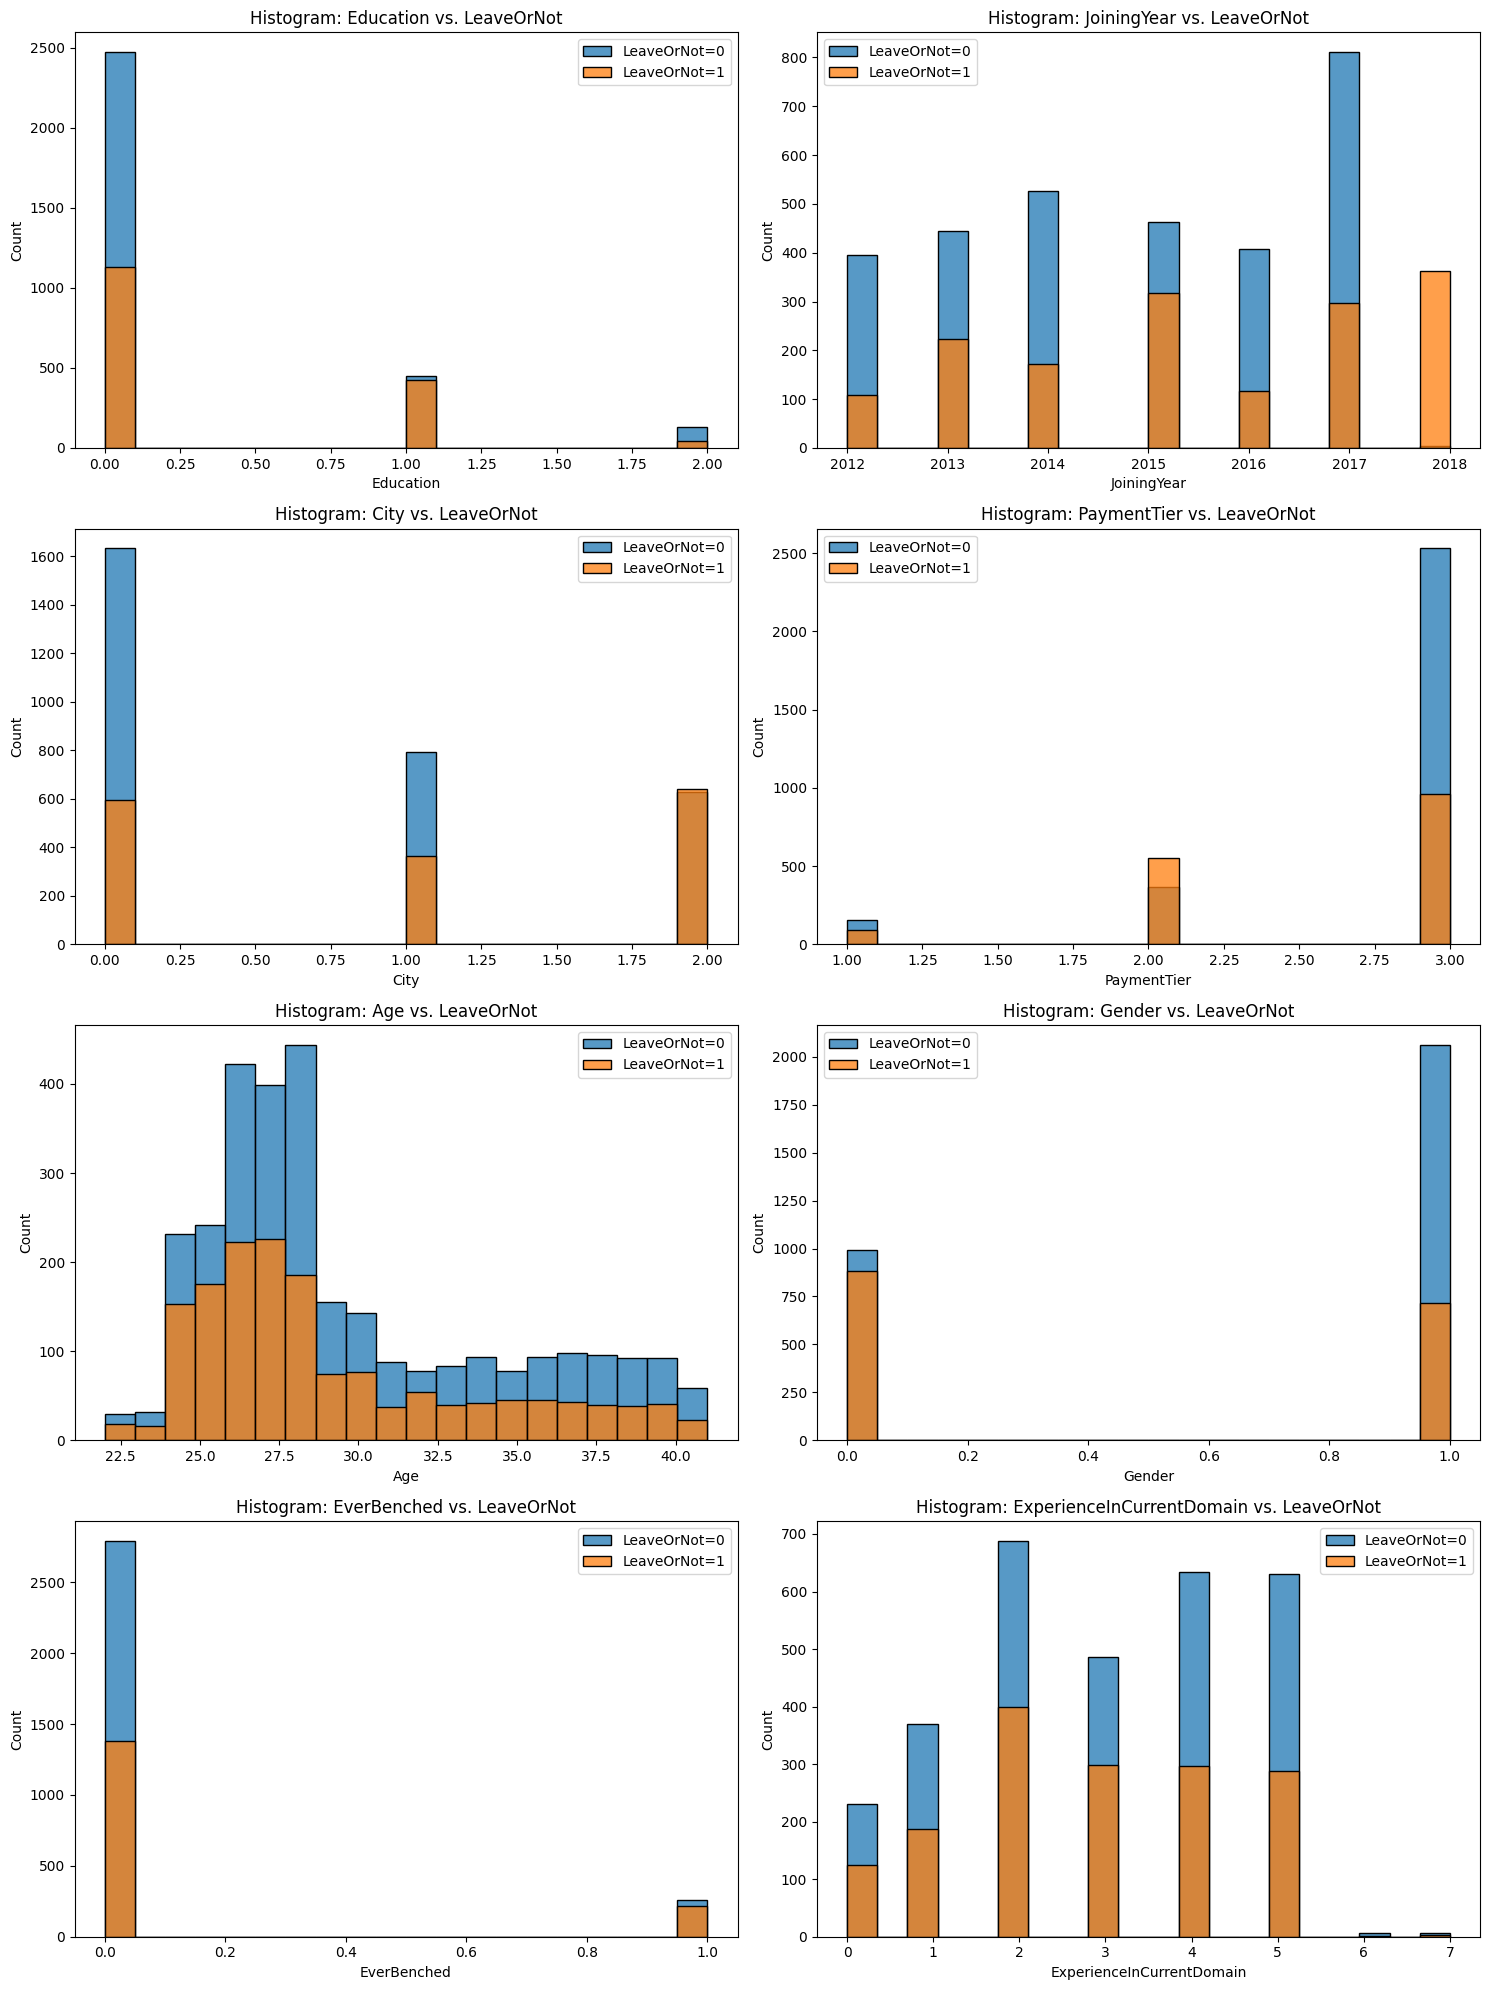

In [ ]:
#VISULAIZING DATA USING HISTOGRAM PLOT

print("VISUALIZATION OF EACH COLUMN WITH RESPECT TO THE TARGET COLUMN")
# Visualization of data for each column against the target variable using histograms
num_columns = len(features.columns)
num_rows = (num_columns + 1) // 2
plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(features.columns, start=1):
    plt.subplot(num_rows, 2, i)
    for label in df[target_column].unique():
        sns.histplot(df[df[target_column] == label][col], bins=20, label=f'{target_column}={label}', kde=False)
    plt.title(f'Histogram: {col} vs. {target_column}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#CHECKING THE ACCURACY SCORE BEFORE THE DATA MITIGATION PROCESS

train_data, test_data, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=random_state)

model_before_resampling = RandomForestClassifier(random_state=random_state)

model_before_resampling.fit(train_data, train_target)
        
predictions_before_resampling = model_before_resampling.predict(test_data)

accuracy_before_resampling = accuracy_score(test_target, predictions_before_resampling)
report_resampled = classification_report(test_target, predictions_before_resampling)
print(f'Model Accuracy before Resampling: {accuracy_resampled}\n Classification Report before Resampling:\n{report_resampled}')

Model Accuracy before Resampling: 0.8873410724156993
 Classification Report before Resampling:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       610
           1       0.82      0.72      0.77       321

    accuracy                           0.85       931
   macro avg       0.84      0.82      0.83       931
weighted avg       0.85      0.85      0.85       931



In [ ]:
#CHECKING THE PRESENCE OF SELECTION BIAS IN THE DATASET(COLUMN WISE)

for col in features.columns:
    print("\n")
    print(col)
    positive_data = df[df[col] == 1]
    negative_data = df[df[col] == 0]

# Calculate statistical parity difference
    favorable_outcome_rate_positive = positive_data[target_column].mean()
    favorable_outcome_rate_negative = negative_data[target_column].mean()

    statistical_parity_difference = favorable_outcome_rate_positive - favorable_outcome_rate_negative

    print(f'Statistical Parity Difference for {col}: {statistical_parity_difference}')

# Check for bias
    if abs(statistical_parity_difference) <= 0.1:
        print(f'NO SIGNIFICANT SELECTION BIAS IS BEEN DETECTED IN {col} COLUMN.')
    else:
        print(f'SELECTION SELECTION BIAS IS DETECTED IN {col} COLUMN.')



Education
Statistical Parity Difference for Education: 0.17444848748581676
SELECTION SELECTION BIAS IS DETECTED IN Education COLUMN.


JoiningYear
Statistical Parity Difference for JoiningYear: nan
SELECTION SELECTION BIAS IS DETECTED IN JoiningYear COLUMN.


City
Statistical Parity Difference for City: 0.0492796947469854
NO SIGNIFICANT SELECTION BIAS IS BEEN DETECTED IN City COLUMN.


PaymentTier
Statistical Parity Difference for PaymentTier: nan
SELECTION SELECTION BIAS IS DETECTED IN PaymentTier COLUMN.


Age
Statistical Parity Difference for Age: nan
SELECTION SELECTION BIAS IS DETECTED IN Age COLUMN.


Gender
Statistical Parity Difference for Gender: -0.21372728581713463
SELECTION SELECTION BIAS IS DETECTED IN Gender COLUMN.


EverBenched
Statistical Parity Difference for EverBenched: 0.1227174103675494
SELECTION SELECTION BIAS IS DETECTED IN EverBenched COLUMN.


ExperienceInCurrentDomain
Statistical Parity Difference for ExperienceInCurrentDomain: -0.01237821192387295
NO SIGNI

In [ ]:
#DATA MITIGATION USING REWEIGHTING TECHNIQUE

# Assuming binary classification for bias mitigation
positive_data = df[target == 1]
negative_data = df[target == 0]

negative_data_resampled = resample(negative_data, replace=True, n_samples=len(positive_data), random_state=random_state)

df_resampled = pd.concat([positive_data, negative_data_resampled])
train_data, test_data, train_target, test_target = train_test_split(df_resampled.drop(columns=[target_column]), le.fit_transform(df_resampled[target_column]), test_size=0.2, random_state=random_state)

# Initialize the model without class weights
model = RandomForestClassifier(random_state=random_state)
model.fit(train_data, train_target)
print(data)

# After model fitting, adjust class weights for the RandomForestClassifier
class_weights = compute_class_weight('balanced', classes=np.unique(train_target), y=train_target)
class_weight_dict = dict(enumerate(class_weights))

model = RandomForestClassifier(random_state=random_state, class_weight=class_weight_dict)
model.fit(train_data, train_target)
print(data)
        


scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Ensure stratified sampling in train-test split
train_data, test_data, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state= random_state, stratify=target)

      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDo

In [ ]:
#FINDING THE ACCURACY SCORE AND CLASSIFICATION REPORT AFTER RESAMPLING TECHNIQUE

predictions_resampled = model.predict(test_data)
accuracy_resampled = accuracy_score(test_target, predictions_resampled)
report_resampled = classification_report(test_target, predictions_resampled)

print("\n")

print(f'Resampled Model Accuracy: {accuracy_resampled}\nResampled Classification Report:\n{report_resampled}')



Resampled Model Accuracy: 0.9097744360902256
Resampled Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       611
           1       0.88      0.85      0.87       320

    accuracy                           0.91       931
   macro avg       0.90      0.90      0.90       931
weighted avg       0.91      0.91      0.91       931

